# Association Analysis
## Frequent Itemset Mining using Apriori Algorithm

### Importing Libaries

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Reading Data

In [ ]:
df = pd.read_csv('retail_data.csv', sep=',')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


Each row of the dataset represents items that were purchased together on the same day at same store.

The dataset is a **sparse dataset** as relatively high percentage of data is NA or NAN or equivalent.

Let's see all the unique items in the dataset.

In [ ]:
items = (df['0'].unique())
items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

### Data Preprocessing

To make use of the apriori module given by mlxtend library, we need to convert the dataset according to it's liking.
apriori module requires a dataframe that has either 0 and 1 or True and False as data.
The data we have is all string (name of items), we need to **One Hot Encode** the data.

##### Custom One Hot Encoding

In [ ]:
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'Bagel': 0,
  'Milk': 0,
  'Wine': 1,
  'Cheese': 1,
  'Eggs': 1,
  'Bread': 1,
  'Meat': 1,
  'Pencil': 1,
  'Diaper': 1},
 {'Bagel': 0,
  'Eggs': 0,
  'Wine': 1,
  'Cheese': 1,
  'Bread': 1,
  'Meat': 1,
  'Pencil': 1,
  'Diaper': 1,
  'Milk': 1},
 {'Bread': 0,
  'Diaper': 0,
  'Pencil': 0,
  'Bagel': 0,
  'Wine': 1,
  'Cheese': 1,
  'Eggs': 1,
  'Meat': 1,
  'Milk': 1},
 {'Bread': 0,
  'Diaper': 0,
  'Pencil': 0,
  'Bagel': 0,
  'Wine': 1,
  'Cheese': 1,
  'Eggs': 1,
  'Meat': 1,
  'Milk': 1},
 {'Cheese': 0,
  'Eggs': 0,
  'Bread': 0,
  'Bagel': 0,
  'Diaper': 0,
  'Milk': 0,
  'Wine': 1,
  'Meat': 1,
  'Pencil': 1},
 {'Meat': 0,
  'Cheese': 0,
  'Wine': 1,
  'Eggs': 1,
  'Bread': 1,
  'Pencil': 1,
  'Bagel': 1,
  'Diaper': 1,
  'Milk': 1},
 {'Bread': 0,
  'Meat': 0,
  'Bagel': 0,
  'Diaper': 0,
  'Milk': 0,
  'Cheese': 1,
  'Wine': 1,
  'Pencil': 1,
  'Eggs': 1},
 {'Wine': 0,
  'Meat': 0,
  'Cheese': 0,
  'Eggs': 0,
  'Bread': 1,
  'Pencil': 1,
  'Bagel': 1,
  'Diaper': 1,
  'Mil

Let's have a look at the One Hot Encoded dataset.


In [ ]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Bagel,Milk,Wine,Cheese,Eggs,Bread,Meat,Pencil,Diaper
0,0,0,1,1,1,1,1,1,1
1,0,1,1,1,0,1,1,1,1
2,0,1,1,1,1,0,1,0,0


The first observation from original dataset:
['Bread', 'Wine','Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper']

Take a look at first observation in our one hot encoded dataframe. Do you think OHE worked?

### Applying Apriori


apriori module from mlxtend library provides fast and efficient apriori implementation.  <br>
<br>
> **apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)**

##### Parameters
- ` df ` : One-Hot-Encoded DataFrame or DataFrame that has 0 and 1 or True and False as values
- ` min_support ` : Floating point value between 0 and 1 that indicates the mininmum support required for an itemset to be selected. <br>
<center> $ # of observation with item / total observation $ </center>
- ` use_colnames ` : This allows to preserve column names for itemset making it more readable.
- ` max_len ` : Max length of itemset generated. If not set, all possible lengths are evaluated.
- ` verbose ` : Shows the number of iterations if >= 1 and low_memory is True. If =1 and low_memory is False , shows the number of combinations.
- ` low_memory ` : <div style="text-align:justify">If True, uses an iterator to search for combinations above min_support. Note that while low_memory=True should only be used for large dataset if memory resources are limited, because this implementation is approx. 3-6x slower than the default.</div>

In [ ]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 180 combinations | Sampling itemset size 3


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.438095,(Wine)
3,0.501587,(Cheese)
4,0.438095,(Eggs)
5,0.504762,(Bread)
6,0.476190,(Meat)
7,0.361905,(Pencil)
8,0.406349,(Diaper)
9,0.225397,"(Bagel, Milk)"


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

num_itemsets = len(ohe_df)

rules = association_rules(freq_items, num_itemsets=num_itemsets, metric="confidence", min_threshold=0.6)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,1.0,0.064641,1.442650,0.402687,0.429268,0.306831,0.605088
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,1.0,0.053172,1.270148,0.350053,0.436364,0.212690,0.607595
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,1.0,0.053172,1.270148,0.350053,0.436364,0.212690,0.607595
3,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,1.0,0.050098,1.297754,0.330409,0.402844,0.229438,0.576958
4,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,1.0,0.078670,1.563203,0.469167,0.465347,0.360288,0.638048
5,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,1.0,0.084958,1.557540,0.500891,0.495146,0.357962,0.662785
6,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,1.0,0.084958,1.477891,0.526414,0.495146,0.323360,0.662785
7,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,1.0,0.058050,1.338624,0.387409,0.411765,0.252964,0.584348
8,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,1.0,0.040756,1.337845,0.296655,0.326531,0.252529,0.516257
9,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,1.0,0.080564,2.952137,0.524816,0.374269,0.661262,0.618116


### Visualizing results

1. **Support vs Confidence**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


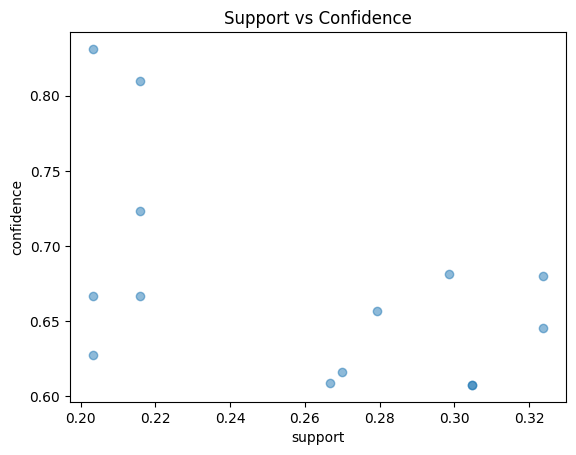

In [ ]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
